In [1]:
# Transferencia de FaceNet a Clasificador de BF con Chalearn en BN y Keras, clases binarias por cada factor
# Miguelangel Moreno Sotelo

In [1]:
import matplotlib.pyplot as plt
import math
import random
import time
import pickle
import keras
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K
from keras.models import model_from_json
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from PIL import Image,ImageOps

Using TensorFlow backend.


## DataSet

In [2]:
class DataSet:
    data_train = None;
    data_test  = None;
    
    # 30935 total
    total_train = 28152;
    total_test  =  2783;
       
    
    def read_pickle(self, name, show=False):
        
        if show:
            print('Cargando pickle',"../DataSet/{}.pickle".format(name));
        pic = pickle.load(open("../DataSet/{}.pickle".format(name), "rb"));
        
        X = np.array(pic['X']);   
        Y = np.array(pic['Y']);
        
        if show:
           print('X-',X.shape)
           print('Y-',Y.shape)        
                
        return X,Y;
                         
        
    def load_dataset(self):
        self.data_train = dict(X=[],Y=[]);
        self.data_test  = dict(X=[],Y=[]);
        
        for i in range(1,4):
            x,y = self.read_pickle('train_clselfie_v8_{}'.format(i), show=True);
            self.data_train['X'].extend(x);
            self.data_train['Y'].extend(y);
        
        x,y = self.read_pickle('test_clselfie_v8', show=True);
        self.data_test['X'].extend(x);
        self.data_test['Y'].extend(y);
           
        
        
        self.data_train['X'] = np.array(self.data_train['X']);        
        self.data_train['Y'] = np.array(self.data_train['Y']);
                
        self.data_test['X'] = np.array(self.data_test['X']);
        self.data_test['Y'] = np.array(self.data_test['Y']);     
       
        
        
        
        print('\nTotal Train Data X:',self.data_train['X'].shape,'Y:',self.data_train['Y'].shape);
        print('\nTotal Test  Data X:',self.data_test['X'].shape,'Y:',self.data_test['Y'].shape);    
        
        

        

In [3]:
# Cargamos Dataset
ds = DataSet();
ds.load_dataset();

Cargando pickle ../DataSet/train_clselfie_v8_1.pickle
X- (9000, 160, 160, 3)
Y- (9000, 5)
Cargando pickle ../DataSet/train_clselfie_v8_2.pickle
X- (9000, 160, 160, 3)
Y- (9000, 5)
Cargando pickle ../DataSet/train_clselfie_v8_3.pickle
X- (10152, 160, 160, 3)
Y- (10152, 5)
Cargando pickle ../DataSet/test_clselfie_v8.pickle
X- (2783, 160, 160, 3)
Y- (2783, 5)

Total Train Data X: (28152, 160, 160, 3) Y: (28152, 5)

Total Test  Data X: (2783, 160, 160, 3) Y: (2783, 5)


Y [1 1 1 0 1]


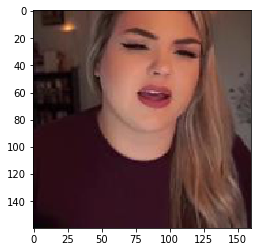

Y [1 0 0 1 0]


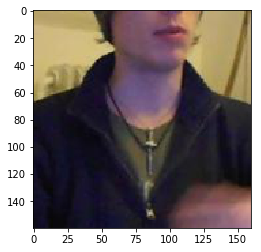

Y [0 0 0 0 1]


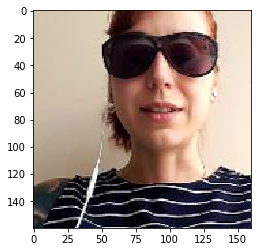

Y [1 0 1 0 1]


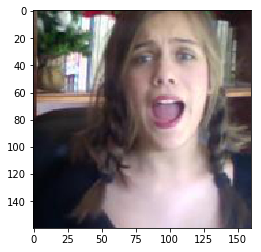

In [4]:
for i in range(0,2):
    print('Y',ds.data_test['Y'][i])
    plt.imshow(ds.data_test['X'][i])
    plt.show();
    
for i in range(0,2):
    print('Y',ds.data_train['Y'][i])
    plt.imshow(ds.data_train['X'][i])
    plt.show();

## Facenet Preentrenado

In [5]:
facenet = load_model('facenet_keras.h5')
facenet.summary();

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_2a_

/home/sia/anaconda3/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
facenet.load_weights('facenet_keras_weights.h5');

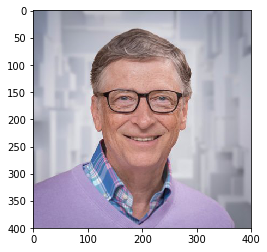

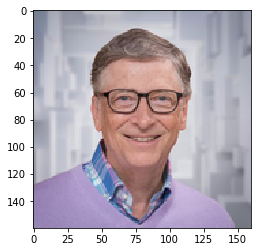

(1, 160, 160, 3)
[[ 0.6992575   0.7383114   0.30453134 -0.5960839   1.1443602   1.2847401
   2.3272135  -1.1439581  -1.7924834  -3.5300379   1.8676809  -2.8427517
  -0.56946963  1.1588119  -1.1546134  -1.1284431   0.7048534  -2.2371433
   0.42910546 -1.3875839   1.056856   -3.9493055   0.55551726  2.0549383
   0.9174155   2.1827457   2.103012   -0.5226636  -0.9872633  -2.4086063
   0.03163895  4.0340548  -1.5236689   1.1585915  -0.45806572  0.95207393
   2.4102077  -2.2369392   1.0984693   1.4483181   1.1973473   0.32722688
   1.1200947  -0.6278354  -2.4195323   2.0888655   1.9562551   0.15422337
  -0.9185022  -3.0134776   1.8924899   0.2293999   1.8070956   2.127598
   0.30201536  4.0280514   0.37523133 -2.6537452   1.9229683   2.41182
  -0.31945035  1.3089612   1.5857297   0.92204434 -0.31524697  0.33523065
   2.5244396  -0.03044887  1.9743626   2.643341    1.0557777   2.4041722
  -0.43952408  2.559788   -2.509464    2.6229157  -0.03590877  1.4084852
  -1.6049722  -2.6694906   0.2538

In [7]:
# Test de facenet

image = plt.imread('Bill_Gates_0000.jpg');
plt.imshow(image)
plt.show();


image = Image.fromarray(image)  

# Fit a la imagen
img_dim = (160,160);
image = ImageOps.fit(image,(img_dim[0],img_dim[1]),Image.ANTIALIAS,centering=(0.5, 0.5));
image = np.array(image).reshape(img_dim[1],img_dim[0],3) 


plt.imshow(image)
plt.show();

X = [];
X.append(image);
X = np.array(X);

print(X.shape)

res= facenet.predict(X);

print(res)

In [8]:
# Modelo de extraccion de Facenet
facenet_ext = Model(inputs=facenet.input, outputs=facenet.get_layer('Mixed_7a').output)
facenet_ext.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
__________________________________________________________________________________________________
Conv2d_2a_

In [9]:
embeding_train = facenet_ext.predict(ds.data_train['X']); 
embeding_test  = facenet_ext.predict(ds.data_test['X']); 

print('Embedings Train',embeding_train.shape)
print('Embedings Test',embeding_test.shape)

Embedings Train (28152, 3, 3, 1792)
Embedings Test (2783, 3, 3, 1792)


## Modelo y Entrenamiento

In [10]:
def save_model(index=0):
    name = 'facenet-1_train';
    model_json = classifier.to_json()
    with open("{}_{}.json".format(name, index), "w") as json_file:
        json_file.write(model_json)
    classifier.save_weights("{}_{}.h5".format(name,index),)
    print("Modelo guardado en disco","{}_{}.h5".format(name,index))

In [43]:
input_cla = Input(shape=(3, 3, 1792))



x=Reshape((3*3* 1792,), input_shape=(3, 3, 1792))(input_cla)
x=Dense(100,activation='relu', input_shape=(3*3*1792,))(x)

x=Dense(200,activation='relu')(x)
x=Dense(200,activation='relu')(x)
x=Dense(200,activation='relu')(x)


# output=Dense(5, activation='sigmoid')(x)
output=Dense(5, )(x)


adam = optimizers.adam(lr=1e-3)
classifier = Model(input_cla, output)
classifier.compile(optimizer=adam, loss=losses.mean_squared_error)
classifier.summary();


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3, 3, 1792)        0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 16128)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               1612900   
_________________________________________________________________
dense_32 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_33 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_34 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 1005      
Total para

In [31]:
save = 1;

In [32]:
global_history = {'val_loss':[], 'loss':[], 'mean_acc':[]}
best_acc = 0;

In [45]:

for i in range(0,100):
    h = classifier.fit(embeding_train, ds.data_train['Y'],
            epochs=1,
            batch_size=100,
            shuffle=False,
            validation_data=(embeding_test, ds.data_test['Y']))
    
    global_history['val_loss'].extend(h.history['val_loss'])
    global_history['loss'].extend(h.history['loss'])
    
    mean_acc = get_global_acc();
    global_history['mean_acc'].append(mean_acc);
    
    print('Mean-acc:',mean_acc)
    
    if mean_acc > best_acc:
        best_acc = mean_acc;
        save_model(index=save);   


Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 3s 93us/step - loss: 0.1569 - val_loss: 0.2294
Mean-acc: 65.43298598634567
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 1s 50us/step - loss: 0.1542 - val_loss: 0.2305
Mean-acc: 65.36830758174632
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 1s 50us/step - loss: 0.1527 - val_loss: 0.2313
Mean-acc: 65.47610492274524
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 1s 50us/step - loss: 0.1515 - val_loss: 0.2320
Mean-acc: 65.41861300754582
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 1s 51us/step - loss: 0.1505 - val_loss: 0.2327
Mean-acc: 65.3611210923464
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [========================

KeyboardInterrupt: 

In [53]:
classifier.load_weights("facenet-1_train_1.h5")
print("Modelo cargado desde disco ")

Modelo cargado desde disco 


In [54]:
print(max(global_history['mean_acc']))

65.86417535034136


In [47]:
print(global_history['mean_acc'])

[59.30291052820697, 63.097376931369034, 65.51922385914482, 65.86417535034136, 65.59108875314408, 64.28314768235717, 63.35609054976644, 62.63025512037369, 62.94646065397054, 62.80273086597197, 64.16816385195831, 64.85088034495149, 64.72871002515271, 64.08192597915918, 64.26158821415738, 64.26877470355731, 63.09019044196909, 64.16816385195833, 64.56342076895437, 64.82932087675171, 64.49155587495508, 64.46999640675531, 64.75026949335249, 63.370463528566304, 62.89615522817104, 61.95472511678046, 60.66115702479338, 61.365432985986345, 61.58102766798419, 61.854114265181465, 64.4699964067553, 63.729787998562685, 63.7800934243622, 64.0603665109594, 63.60761767876393, 63.241106719367586, 63.938196191160614, 63.873517786561266, 62.781171397772184, 62.83147682357168, 63.657923104563416, 62.49371182177506, 62.70930650377291, 64.19690980955804, 64.11067193675889, 63.65073661516349, 63.73697448796263, 64.0316205533597, 63.75134746676248, 63.35609054976644, 63.37765001796622, 63.85195831836148, 63.85

In [49]:
print(global_history['loss'])

[0.32797471642003, 0.20698062348692686, 0.19210134525382408, 0.18156374790013666, 0.17177447403322468, 0.1721351222029529, 0.16693501006658357, 0.16459377139434112, 0.17197695778247205, 0.17324342020755804, 0.16953801724908366, 0.16313292124234807, 0.15929058038754773, 0.16205259632191119, 0.16060583108179133, 0.15695632198197187, 0.1558724365870141, 0.16011998992657825, 0.16870460753377, 0.15255442855159274, 0.15186580347702328, 0.15555855506593344, 0.15229807874866932, 0.15367451429782045, 0.15073153735981404, 0.1508122329700989, 0.15199524463895675, 0.15671463471629057, 0.14940749425213423, 0.14630163215793104, 0.17662249353078321, 0.16621335379675595, 0.16214809392910512, 0.15659220788006453, 0.154585810855103, 0.15608171982736743, 0.1543409406490948, 0.15234900625440065, 0.15429634525080438, 0.1524544914972125, 0.15089597589748935, 0.1508792603770062, 0.15055027881567876, 0.15987509531721908, 0.15621341481745565, 0.1550749154291935, 0.15337130579061045, 0.15148345117212933, 0.1443

In [51]:
print(global_history['val_loss'])

[0.2494145621242088, 0.23051001076920188, 0.22088006423117656, 0.22816407682653214, 0.23859623770597296, 0.24427268823573284, 0.2536148417726336, 0.2671078840605955, 0.23874807305850873, 0.23758616322263984, 0.22836322639642154, 0.2363743391068685, 0.24069780299250615, 0.2325706737336177, 0.23890500308753687, 0.2591620836911594, 0.2643921502494058, 0.2610805814016906, 0.2399699950802896, 0.24816057543252554, 0.25261986116432605, 0.22741755443192455, 0.245373823174332, 0.2448340675951207, 0.2528191994537007, 0.2556498728443554, 0.2856166672565249, 0.2563035775550269, 0.26524563939011103, 0.25388624457802395, 0.23851769008719576, 0.2499395268258113, 0.25037603027800026, 0.2508133640670108, 0.2553057445175049, 0.2590887017208083, 0.24954587820297602, 0.25177619605453333, 0.2574979450220347, 0.25845883917859935, 0.25563603411507274, 0.2656669836977254, 0.26449064981624715, 0.25135967485603994, 0.24702907057276227, 0.25313897712000233, 0.2482331076565296, 0.25161493825282805, 0.255262474104

In [56]:
%matplotlib inline

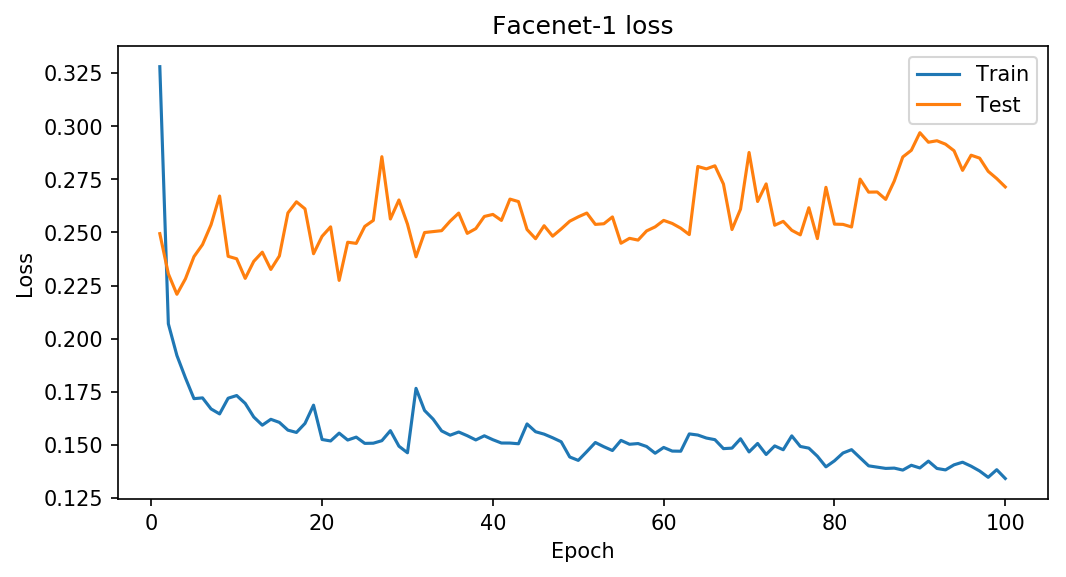

In [59]:
# Plot training & validation loss values
fig =plt.figure(figsize=(8,4),dpi=150)
fig,axes=plt.subplots(figsize=(8,4),dpi=150)
x = np.arange(1,101,1);

axes.plot(x, global_history['loss'][0:200])
axes.plot(x, global_history['val_loss'][0:200])

plt.title('Facenet-1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')


fig.savefig("facenet1-full.png",dpi=150) 

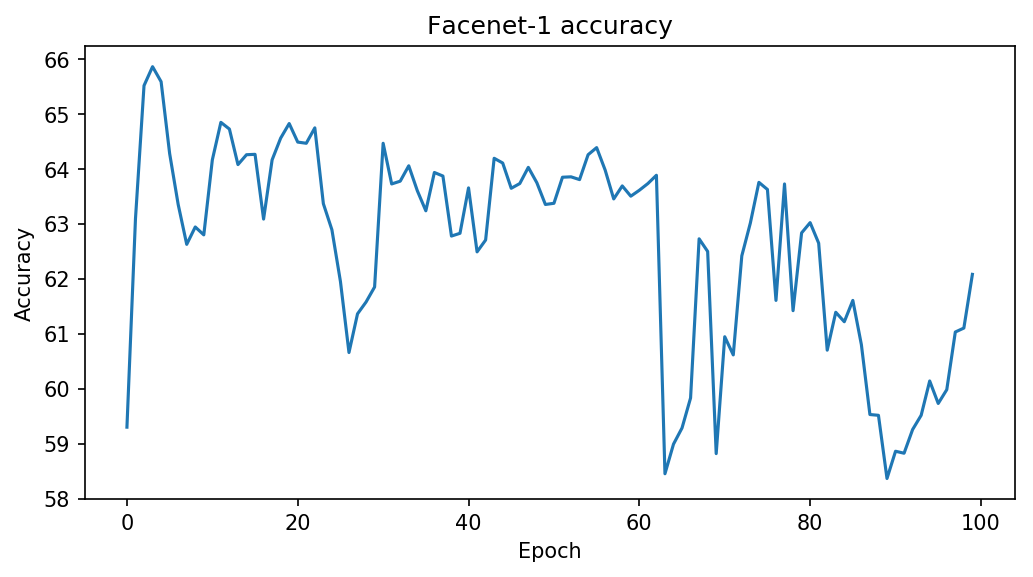

In [64]:
# Plot ACC
fig =plt.figure(figsize=(8,4),dpi=150)
fig,axes=plt.subplots(figsize=(8,4),dpi=150)

x = np.arange(1,24,1);
axes.plot(global_history['mean_acc'][0:200])
plt.title('Facenet-1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


fig.savefig("facenet1-acc.png",dpi=150) 

In [55]:
# Test como clasificacion binaria
def test_factor_class(index=0):
    X = embeding_test;
    Y = ds.data_test['Y'];
    out = classifier.predict(X)
    
    limit = 0.5714; # 4/7
#     limit = 0.5;
    
    acc = 0;

    for i in range(out.shape[0]): 
        if Y[i][index]>limit and out[i][index]>limit:
            acc = acc + 1;
        elif Y[i][index]<=limit and out[i][index]<=limit:
            acc = acc + 1;

    acc = acc / out.shape[0];
    acc *= 100;
    
    return acc;

def get_global_acc(show=False):

    acc_global = 0;

    acc = test_factor_class(index=0);
    acc_global += acc;
    if show:
        print('O',acc);   

    acc = test_factor_class(index=1);
    acc_global += acc;
    if show:
        print('C',acc);    

    acc = test_factor_class(index=2);
    acc_global += acc;
    if show:
        print('E',acc);  

    acc = test_factor_class(index=3);
    acc_global += acc;
    if show:
        print('A',acc);    

    acc = test_factor_class(index=4);
    acc_global += acc;
    if show:
        print('N',acc);  

    acc_global = acc_global / 5;
    if show:
        print('\nPromedio',acc_global)
        
    return acc_global;

prom = get_global_acc(show=True);
# print(prom)

O 61.480416816385194
C 69.56521739130434
E 73.23032698526771
A 60.68990298239309
N 64.35501257635646

Promedio 65.86417535034136


In [42]:
# Matriz de confusion
Y = ds.data_test['Y'][:];
out = classifier.predict(embeding_test[:])

limit = 0.5714; # 4/7

# Construccion de la matriz
matrix = np.zeros((2,2))

for i in range(out.shape[0]):
#     print(tar[i])
#     print(out[i],'\n')
    
    for j in range(out.shape[1]):
        
        if Y[i][j]==0 and out[i][j]<=limit: 
            matrix[0][0] += 1;     
        elif Y[i][j]==0 and out[i][j]>limit:
            matrix[1][0] += 1; 
        elif Y[i][j]==1 and out[i][j]<=limit:
            matrix[0][1] += 1;     
        elif Y[i][j]==1 and out[i][j]>limit:
            matrix[1][1] += 1; 
            
        
# Imprimimos con formato
just = 8;
header = '----'
header += repr(0).rjust(just)
header += repr(1).rjust(just)
print(header)


for i in range(matrix.shape[0]):
    row = str(i)+'    ';
    
    for j in range(matrix.shape[1]):        
        row += repr(int(matrix[i][j])).rjust(just)
        
    row += repr(int(sum(matrix[i]))).rjust(just)
    
    print(row)

row = '-----';
for i in range(matrix.shape[1]):
    row += repr(int(sum(matrix[:,i]))).rjust(just)
print(row)

success = 0;
for i in range(0,2):
    success += matrix[i][i]
    
print('\n\nCorrectos',int(success))
print('Total',int(sum(sum(matrix))))
print('Acc',success/sum(sum(matrix)))

----       0       1
0        6936    3527   10463
1        1223    2229    3452
-----    8159    5756


Correctos 9165
Total 13915
Acc 0.6586417535034136
